In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('IMDB-Movie-Data.csv')
df

In [ ]:
df = df.sample(frac = 1)
df = df.reset_index()

df = df.fillna(0)

In [ ]:
labels = df['Metascore']
df = df.drop('Metascore', axis=1)
df = df.drop('index', axis=1)
df = df.drop('Rank', axis=1)
df = df.drop('Title', axis=1)
df = df.drop('Genre', axis=1)
df = df.drop('Description', axis=1)
df = df.drop('Director', axis=1)
df = df.drop('Actors', axis=1)
df = df.astype(np.float32)

df

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,2015.0,101.0,6.5,27730.0,0.810000
1,2016.0,86.0,6.1,3843.0,0.000000
2,2008.0,131.0,7.6,352023.0,15.700000
3,2007.0,113.0,7.1,241.0,0.000000
4,2014.0,95.0,7.3,50388.0,50.150002
...,...,...,...,...,...
995,2006.0,120.0,7.3,87887.0,5.480000
996,2009.0,85.0,2.7,59512.0,9.350000
997,2008.0,86.0,6.2,96718.0,52.529999
998,2016.0,98.0,6.1,26521.0,4.200000


In [ ]:
labels = np.array(labels)
labels.shape

(1000,)

In [ ]:
features = df.iloc[:, 0:].values

for i in range(len(df.columns)):
    features[:,i] = list(map(lambda x: ((x-min(features[:,i])) / (max(features[:,i]) - min(features[:,i]))) , features[:,i]))

features = np.array(features)
features.shape

(1000, 5)

In [ ]:
x_train = features[:int((labels.shape[0] * 80) / 100), :]
y_train = labels[:int((labels.shape[0] * 80) / 100)]
x_test = features[int((labels.shape[0] * 80) / 100):, :]
y_test = labels[int((labels.shape[0] * 80) / 100):]
x_train.shape

(800, 5)

**Regresyon**

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred, y_test


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test,y_pred)

0.11754096219278576

In [ ]:
print('MAE  : ', mean_absolute_error(y_test, y_pred))
print('MSE  : ', mean_squared_error(y_test, y_pred, squared=False))

MAE  :  14.965387144088744
MSE  :  21.492180140993366


**Yapay Sinir Ağları**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler

In [ ]:
model = Sequential()
model.add(layers.Dense(8, activation="sigmoid", input_dim=5))
model.add(layers.Dense(16, activation="sigmoid"))
model.add(layers.Dense(32, activation="sigmoid"))
model.add(layers.Dense(64, activation="sigmoid"))
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(64, activation="sigmoid"))
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(x_train, y_train, batch_size=64, epochs=555, validation_split=0.2)

Epoch 1/555
10/10 [==============================] - 0s 14ms/step - loss: 3446.5132 - mse: 3446.5132 - val_loss: 3287.0625 - val_mse: 3287.0625
Epoch 2/555
10/10 [==============================] - 0s 3ms/step - loss: 3248.9888 - mse: 3248.9888 - val_loss: 3106.6216 - val_mse: 3106.6216
Epoch 3/555
10/10 [==============================] - 0s 3ms/step - loss: 3089.7222 - mse: 3089.7222 - val_loss: 2969.7239 - val_mse: 2969.7239
Epoch 4/555
10/10 [==============================] - 0s 3ms/step - loss: 2974.8491 - mse: 2974.8491 - val_loss: 2876.9624 - val_mse: 2876.9624
Epoch 5/555
10/10 [==============================] - 0s 3ms/step - loss: 2897.8018 - mse: 2897.8018 - val_loss: 2813.2310 - val_mse: 2813.2310
Epoch 6/555
10/10 [==============================] - 0s 3ms/step - loss: 2842.1340 - mse: 2842.1340 - val_loss: 2762.2966 - val_mse: 2762.2966
Epoch 7/555
10/10 [==============================] - 0s 3ms/step - loss: 2794.8101 - mse: 2794.8101 - val_loss: 2716.2976 - val_mse: 2716.297

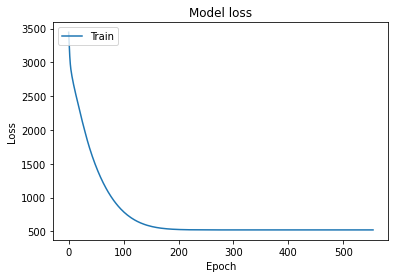

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print("mse: {}".format(model.evaluate(x=x_test, y=y_test, batch_size=64)))

4/4 [==============================] - 0s 2ms/step - loss: 434.5265 - mse: 434.5265
mse: [434.5264587402344, 434.5264587402344]
